<table align="center" width="100%">
    <tr>
        <td style="background-color: #000000;">
            <div align="center" class="yulu-title" style="font-family: 'Bebas Neue', sans-serif; font-size: 42px; color: #e30b14;">
                <b><h1>Aerofit</h1></b>
            </div>
        </td>
    </tr>
</table>

<!-- Link to the Bebas Neue font from Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Bebas+Neue&display=swap" rel="stylesheet">


# Table of Contents

1. **[Defining Problem Statement and Analysing basic metrics](#ps_abm)**
    - 1.1 **[Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary](#obs)**

2. **[Non-Graphical Analysis: Value counts and unique attributes](#nga)**

3. **[Visual Analysis - Univariate & Bivariate](#viz)**
    - 3.1 **[For continuous variable(s): Distplot, countplot, histogram for univariate analysis](#cont)**
    - 3.2 **[For Categorical variable(s): Boxplot](#cat)**
    - 3.3 **[For correlation: Heatmaps, Pairplots](#corr)**

4. **[Missing Value & Outlier Detection](#miss_outl)**

5. **[Business Insights based on Non-Graphical and Visual Analysis](#insights)**
    - 5.1 **[Comments on the range of attributes](#roa)**
    - 5.2 **[Comments on the distribution of the variables and relationship between them](#dov_rbt)**
    - 5.3 **[Comments for each univariate and bivariate plot](#univ_biv)**
   
6. **[Recommendations:  Actionable items for business](#rec)**

==========================================================================================
# 1. Defining Problem statement and analysing basic metrics:<a id='ps_abm'></a>
==========================================================================================

Aerofit, a leading brand in fitness equipment, wants to **identify the characteristics of the target audience** for each of its treadmill products (KP281, KP481, KP781). The objective is to **develop customer profiles** for each product type and analyze whether there are differences in customer characteristics (such as age, gender, education, marital status, usage, income, fitness level, and miles run) across these products. This analysis will help Aerofit provide better recommendations to new customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Aerofit dataset.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Here's a breakdown of the columns in the dataset:

- __Product__: The code or identifier for the product (e.g., KP281, KP481, KP781).
- __Age__: The age of the individual in years.
- __Gender__: The gender of the individual (Male or Female).
- __Education__: The level of education of the individual.
- __MaritalStatus__: The marital status of the individual (Single or Partnered).
- __Usage__: The level of product usage (possibly on a scale from 1 to 6).
- __Fitness__: The fitness level of the individual (possibly on a scale from 1 to 5).
- __Income__: The income of the individual.
- __Miles__: The number of miles associated with the product.

## 1.1 Observations of shape of data, data types of all attributes, conversion of categorical attributes to 'category' (If required), statistical summary: <a id='obs'></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
# Converting relevant columns to 'category' data type
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

# Verify the changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB
None


### Observations from Data Analysis

1. **Shape of the Data:**
   - The dataset contains **180 entries** (rows) and **9 attributes** (columns).
   - This indicates a moderately sized dataset, which is manageable for most data analysis and machine learning tasks.

2. **Data Types of All Attributes:**
   - The dataset comprises a mix of **categorical** and **numerical** variables:
     - **Categorical Variables:** Initially, `Product`, `Gender`, and `MaritalStatus` were of the `object` data type, which represents strings in pandas.
     - **Numerical Variables:** The other six variables (`Age`, `Education`, `Usage`, `Fitness`, `Income`, and `Miles`) are of the `int64` data type, representing integers.
   - After analyzing the dataset, we identified that `Product`, `Gender`, and `MaritalStatus` should be converted to a `category` data type, which is more appropriate for data that represents discrete categories.

3. **Conversion of Categorical Attributes to 'Category':**
   - The columns `Product`, `Gender`, and `MaritalStatus` were converted from the `object` data type to the `category` data type. This conversion is beneficial because:
     - **Memory Optimization:** The `category` data type uses less memory compared to the `object` type, which is particularly useful for larger datasets.
     - **Performance Improvement:** Operations such as grouping, sorting, and comparisons are faster with the `category` type compared to the `object` type.
     - **Data Integrity:** Using the `category` data type helps to enforce that these columns contain only specific allowed values (categories), reducing the chances of data entry errors.

4. **Statistical Summary of Numerical Attributes:**
   - The `describe()` function provided a statistical summary of all the numerical attributes in the dataset:
     - **Age:**
       - The age range of customers spans from **18** to **50** years.
       - The average age of the customers is approximately **28.79** years, indicating that most customers are relatively young adults.
     - **Education:**
       - The education levels range from **12** to **21** years.
       - The median education level is **16**, which could correspond to a high school graduate or equivalent.
     - **Usage:**
       - The usage of the treadmill ranges from **2** to **7** times per week.
       - The median usage frequency is **3** times per week, suggesting moderate use among most customers.
     - **Fitness:**
       - The fitness score ranges from **1** to **5**, with an average of approximately **3.31**.
       - The distribution of fitness levels appears relatively balanced, with a median of **3**.
     - **Income:**
       - The annual income of customers ranges from **29,562** to **104,581**.
       - The mean income is **53,719.58**, with a standard deviation of **16,506.68**, indicating moderate income variability among the customers.
     - **Miles:**
       - The distance covered on the treadmill per week varies from **21** to **360** miles.
       - The average distance covered is **103.19** miles per week, with a wide standard deviation of **51.86** miles, suggesting a high degree of variation in usage patterns.

### Conclusion:
- The dataset appears to be well-structured with a good mix of numerical and categorical data.
- The conversion of categorical variables to the `category` data type is appropriate and beneficial for memory and performance optimizations.
- The statistical summary provides insights into customer demographics, their treadmill usage habits, fitness levels, and income distribution.
  
Overall, the dataset is ready for further exploratory data analysis (EDA) and modeling. Moving forward, we could explore potential relationships between these variables, identify key factors influencing treadmill usage, and segment customers for targeted marketing or product development strategies.

===============================================================================================
# 2. Non-graphical Analysis: Value Counts and Unique attributes:<a id='nga'></a>
===============================================================================================

In [6]:
df_KP281 = df[df['Product']=='KP281']
df_KP281.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
df_KP281.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


### Observations on the "KP281" Product Data

1. **Filtering Data for Product 'KP281':**
   - We filtered the dataset to focus on the entries where the `Product` column is equal to `'KP281'`.
   - This subset includes **80 entries**, which represent customers who have purchased or are using the `KP281` treadmill model.

2. **Statistical Summary of Numerical Attributes for 'KP281':**
   - The summary statistics for the `KP281` product provide insights into the demographic and usage patterns of customers who chose this particular model:
     - **Age:**
       - The age range of customers is from **18** to **50** years, with an average age of **28.55** years. This shows that, similar to the full dataset, most customers are relatively young adults.
       - The standard deviation of **7.22** indicates some age variability among customers.
     - **Education:**
       - The education levels range from **12** to **18** years, with an average of **15.04** years. This suggests that the majority of customers have at least some college education or higher.
     - **Usage:**
       - The treadmill usage frequency ranges from **2** to **5** times per week, with an average of approximately **3.09** times per week. This indicates moderate use of the `KP281` treadmill among customers.
     - **Fitness:**
       - The fitness scores for customers range from **1** to **5**, with a mean score of **2.96**. This suggests a moderate fitness level, with some variation across the customer base.
     - **Income:**
       - The income of customers ranges from **29,562** to **68,220**, with an average income of **46,418.03**. The lower mean income compared to the overall dataset might suggest that the `KP281` model is more popular among customers with a relatively lower income level.
     - **Miles:**
       - The distance covered per week ranges from **38** to **188** miles, with an average of **82.79** miles per week. This average is lower than the overall dataset average (103.19 miles), indicating that customers using the `KP281` treadmill tend to cover less distance weekly compared to other models.

3. **Comparison with the Overall Dataset:**
   - **Age:** The average age of `KP281` customers (28.55) is slightly lower than the average age of the entire dataset (28.79).
   - **Education:** The mean education level for `KP281` customers (15.04) is slightly lower than the overall dataset's average (15.57).
   - **Usage:** The average usage for `KP281` (3.09) is somewhat lower compared to the overall dataset average (3.46), suggesting less frequent usage of this model.
   - **Fitness:** The mean fitness score for `KP281` (2.96) is also lower than the dataset's overall mean (3.31), suggesting that this treadmill model might appeal more to customers with slightly lower fitness levels.
   - **Income:** The average income of `KP281` customers (46,418.03) is considerably lower than the overall dataset's average (53,719.58), indicating that the `KP281` model is likely chosen more frequently by customers with lower income levels.
   - **Miles:** The average miles covered per week by `KP281` customers (82.79) is significantly lower than the overall dataset's average (103.19). This reinforces the idea that customers using the `KP281` treadmill tend to engage in less intensive workouts compared to other models.

### Conclusion:
- The `KP281` treadmill model appears to attract a specific customer segment:
  - Generally younger customers with slightly lower education levels.
  - Customers with relatively lower income and fitness levels.
  - Users who tend to have moderate workout frequencies and cover fewer miles per week.

These insights could help in understanding the target market for the `KP281` model and tailoring marketing strategies accordingly. Additionally, it could inform product development and improvement strategies aimed at increasing the appeal of this treadmill model to a broader customer base.

In [8]:
df_KP481 = df[df['Product']=='KP481']
df_KP481.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
84,KP481,21,Female,14,Partnered,5,4,34110,212


In [9]:
df_KP481.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


### Observations on the "KP481" Product Data

1. **Filtering Data for Product 'KP481':**
   - The dataset was filtered to focus on the entries where the `Product` column is equal to `'KP481'`.
   - This subset includes **60 entries**, which represent customers who have purchased or are using the `KP481` treadmill model.

2. **Statistical Summary of Numerical Attributes for 'KP481':**
   - The summary statistics for the `KP481` product provide insights into the demographic and usage patterns of customers who chose this particular model:
     - **Age:**
       - The age range of customers is from **19** to **48** years, with an average age of **28.9** years. This shows that, similar to the full dataset and the `KP281` product, most customers are relatively young adults.
       - The standard deviation of **6.65** indicates some variability in age among customers, but it is slightly lower than that for `KP281`, suggesting a somewhat narrower age range.
     - **Education:**
       - The education levels range from **12** to **18** years, with an average of **15.12** years. This indicates that customers tend to have at least some college education or higher.
     - **Usage:**
       - The treadmill usage frequency ranges from **2** to **5** times per week, with an average of approximately **3.07** times per week. This suggests moderate use of the `KP481` treadmill, similar to the `KP281` model.
     - **Fitness:**
       - The fitness scores for customers range from **1** to **4**, with a mean score of **2.9**. This indicates a slightly lower fitness level compared to the overall dataset and is similar to the `KP281` model.
     - **Income:**
       - The income of customers ranges from **31,836** to **67,083**, with an average income of **48,973.65**. This income range is slightly higher than that of the `KP281` model, suggesting that `KP481` is chosen by customers with a somewhat higher income level.
     - **Miles:**
       - The distance covered per week ranges from **21** to **212** miles, with an average of **87.93** miles per week. This average is higher than the `KP281` customers (82.79 miles) but still lower than the overall dataset average (103.19 miles), indicating that `KP481` customers engage in slightly more intensive workouts compared to `KP281` users.

3. **Comparison with the Overall Dataset and 'KP281' Product:**
   - **Age:** The average age of `KP481` customers (28.9) is very close to the average age of the entire dataset (28.79) and similar to the average age for `KP281` (28.55).
   - **Education:** The mean education level for `KP481` customers (15.12) is slightly lower than the overall dataset's average (15.57), and slightly higher than the `KP281` customers (15.04).
   - **Usage:** The average usage for `KP481` (3.07) is somewhat lower compared to the overall dataset average (3.46), and very similar to the `KP281` (3.09), indicating moderate usage for this model as well.
   - **Fitness:** The mean fitness score for `KP481` (2.9) is slightly lower than both the dataset's overall mean (3.31) and the `KP281` mean (2.96). This shows that the `KP481` treadmill might appeal to customers with moderately lower fitness levels.
   - **Income:** The average income of `KP481` customers (48,973.65) is higher than the `KP281` customers (46,418.03) but still below the overall dataset average (53,719.58). This suggests that `KP481` appeals to customers with slightly higher incomes than `KP281` but still relatively lower incomes overall.
   - **Miles:** The average miles covered per week by `KP481` customers (87.93) is higher than `KP281` customers (82.79) but remains lower than the overall dataset average (103.19). This indicates that customers using the `KP481` treadmill engage in slightly more distance per week than `KP281` customers, but less than the overall dataset.

### Conclusion:
- The `KP481` treadmill model also appears to attract a specific customer segment:
  - Generally younger customers with slightly lower to moderate education levels.
  - Customers with relatively lower to moderate income levels.
  - Users who tend to have moderate workout frequencies and cover a moderate number of miles per week.

These insights suggest that the `KP481` model is positioned similarly to the `KP281` but might attract customers with a slightly higher income and possibly those who are marginally more fitness-oriented, though still within a similar demographic profile.

In [10]:
df_KP781 = df[df['Product']=='KP781']
df_KP781.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100


In [11]:
df_KP781.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


### Observations on the "KP781" Product Data

1. **Filtering Data for Product 'KP781':**
   - The dataset was filtered to focus on entries where the `Product` column is equal to `'KP781'`.
   - This subset includes **40 entries**, representing customers who have purchased or are using the `KP781` treadmill model.

2. **Statistical Summary of Numerical Attributes for 'KP781':**
   - The summary statistics for the `KP781` product give us insights into the demographic and usage patterns of customers who chose this model:
     - **Age:**
       - The age range of customers is from **22** to **48** years, with an average age of **29.1** years. This shows that `KP781` is popular among young adults, with a slightly higher mean age than `KP281` and `KP481` customers.
       - The standard deviation of **6.97** indicates that there is a moderate variability in the age of customers.
     - **Education:**
       - The education levels range from **14** to **21** years, with an average of **17.33** years. This indicates that customers of `KP781` have relatively high levels of education, higher than those for both `KP281` and `KP481` products.
     - **Usage:**
       - The treadmill usage frequency ranges from **3** to **7** times per week, with an average of approximately **4.78** times per week. This suggests that `KP781` customers use the treadmill more frequently than customers of the other two models.
     - **Fitness:**
       - The fitness scores for customers range from **3** to **5**, with a mean score of **4.63**. This indicates a high fitness level among the customers, much higher than both the overall dataset average and the other two products (`KP281` and `KP481`).
     - **Income:**
       - The income of customers ranges from **48,556** to **104,581**, with an average income of **75,441.58**. This income range is significantly higher than that of the `KP281` and `KP481` models, suggesting that `KP781` is chosen by customers with a higher income level.
     - **Miles:**
       - The distance covered per week ranges from **80** to **360** miles, with an average of **166.9** miles per week. This average is significantly higher than that for both `KP281` and `KP481` customers, indicating that `KP781` customers are engaging in much more intensive workouts.

3. **Comparison with the Overall Dataset and Other Products:**
   - **Age:** The average age of `KP781` customers (29.1) is slightly higher than both the overall dataset (28.79) and the `KP281` (28.55) and `KP481` (28.9) products.
   - **Education:** The mean education level for `KP781` customers (17.33) is substantially higher than both the overall dataset (15.57) and the `KP281` (15.04) and `KP481` (15.12) products, suggesting that `KP781` attracts more highly educated customers.
   - **Usage:** The average usage for `KP781` (4.78) is significantly higher compared to both the overall dataset average (3.46) and the other products (`KP281`: 3.09, `KP481`: 3.07). This indicates that `KP781` customers use the treadmill much more frequently.
   - **Fitness:** The mean fitness score for `KP781` (4.63) is substantially higher than both the dataset's overall mean (3.31) and the other two products (`KP281`: 2.96, `KP481`: 2.9). This suggests that `KP781` is favored by highly fit individuals.
   - **Income:** The average income of `KP781` customers (75,441.58) is considerably higher than both `KP281` customers (46,418.03) and `KP481` customers (48,973.65), and is also well above the overall dataset average (53,719.58). This indicates that the `KP781` appeals to a more affluent customer base.
   - **Miles:** The average miles covered per week by `KP781` customers (166.9) is significantly higher than both `KP281` (82.79) and `KP481` (87.93) customers, as well as the overall dataset average (103.19). This demonstrates that `KP781` customers tend to engage in much more intensive workouts.

### Conclusion:
- The `KP781` treadmill model clearly attracts a different customer segment compared to `KP281` and `KP481`:
  - **Higher Age and Education:** Slightly older customers with a much higher level of education.
  - **Higher Income and Fitness Level:** A more affluent customer base with a high fitness level.
  - **Higher Usage and Miles:** More frequent and intensive usage, covering significantly more miles per week.
  
These insights suggest that the `KP781` treadmill model is positioned as a premium product appealing to highly educated, fit, and affluent customers who are looking for intensive workout equipment.

In [12]:
print(df_KP281['Gender'].value_counts(),"\n")
print(df_KP281['MaritalStatus'].value_counts(),"\n")
print(df_KP281['Usage'].value_counts(),"\n")
print(df_KP281['Fitness'].value_counts())

Female    40
Male      40
Name: Gender, dtype: int64 

Partnered    48
Single       32
Name: MaritalStatus, dtype: int64 

3    37
4    22
2    19
5     2
Name: Usage, dtype: int64 

3    54
2    14
4     9
5     2
1     1
Name: Fitness, dtype: int64


### Analysis of Important Value Counts for `KP281` Product

Based on the value counts for various attributes of the customers who purchased or use the `KP281` treadmill model, we can make the following observations:

1. **Gender Distribution:**
   - The distribution of gender is **evenly split** for `KP281` customers:
     - **40 Female** and **40 Male**.
   - This indicates that the `KP281` treadmill model is equally popular among both male and female customers.

2. **Marital Status Distribution:**
   - The `MaritalStatus` attribute shows the following distribution:
     - **48 Partnered** (60% of customers)
     - **32 Single** (40% of customers)
   - This suggests that the majority of `KP281` customers are in a partnered relationship, although a significant proportion are single as well.

3. **Usage Distribution:**
   - The `Usage` attribute, which represents the number of times the treadmill is used per week, is distributed as follows:
     - **3 times/week:** 37 customers (46.25%)
     - **4 times/week:** 22 customers (27.5%)
     - **2 times/week:** 19 customers (23.75%)
     - **5 times/week:** 2 customers (2.5%)
   - The most common usage frequency for `KP281` customers is **3 times per week**, followed by 4 and 2 times per week. Very few customers use it 5 times per week. This suggests a moderate level of usage among most customers.

4. **Fitness Level Distribution:**
   - The `Fitness` attribute, which ranges from 1 (least fit) to 5 (most fit), shows the following distribution:
     - **3 (Average Fitness):** 54 customers (67.5%)
     - **2 (Below Average Fitness):** 14 customers (17.5%)
     - **4 (Above Average Fitness):** 9 customers (11.25%)
     - **5 (Highest Fitness):** 2 customers (2.5%)
     - **1 (Lowest Fitness):** 1 customer (1.25%)
   - The majority of `KP281` customers have an **average fitness level (3)**. A smaller proportion have below average (2) or above average (4) fitness levels, while very few have the lowest (1) or the highest (5) fitness levels. This suggests that the `KP281` model is most appealing to those who consider themselves of average fitness.

### Conclusion:
- The `KP281` treadmill model appears to have a balanced gender appeal, with equal numbers of male and female customers.
- It is more popular among customers who are in a partnered relationship.
- The most common usage frequency is moderate (3 times per week), and the fitness level of most customers is average. This model might be targeting individuals who engage in regular but moderate levels of physical activity and who may not be high-performance athletes. 


In [13]:
print(df_KP481['Gender'].value_counts(),"\n")
print(df_KP481['MaritalStatus'].value_counts(),"\n")
print(df_KP481['Usage'].value_counts(),"\n")
print(df_KP481['Fitness'].value_counts())

Male      31
Female    29
Name: Gender, dtype: int64 

Partnered    36
Single       24
Name: MaritalStatus, dtype: int64 

3    31
2    14
4    12
5     3
Name: Usage, dtype: int64 

3    39
2    12
4     8
1     1
Name: Fitness, dtype: int64


### Analysis of Important Value Counts for `KP481` Product

Based on the value counts for various attributes of the customers who purchased or use the `KP481` treadmill model, we can observe the following:

1. **Gender Distribution:**
   - The distribution of gender for `KP481` customers is as follows:
     - **31 Male** (51.67%)
     - **29 Female** (48.33%)
   - The gender distribution is almost balanced, with a slightly higher number of male customers compared to female customers. This suggests that the `KP481` treadmill model has a broad appeal across genders but is marginally more popular among males.

2. **Marital Status Distribution:**
   - The `MaritalStatus` attribute shows the following distribution:
     - **36 Partnered** (60% of customers)
     - **24 Single** (40% of customers)
   - Similar to the `KP281` model, the majority of `KP481` customers are in a partnered relationship. However, a significant portion (40%) of customers are single, indicating that this model is also attractive to a diverse marital status demographic.

3. **Usage Distribution:**
   - The `Usage` attribute, which indicates the number of times the treadmill is used per week, is distributed as follows:
     - **3 times/week:** 31 customers (51.67%)
     - **2 times/week:** 14 customers (23.33%)
     - **4 times/week:** 12 customers (20%)
     - **5 times/week:** 3 customers (5%)
   - Most `KP481` customers use the treadmill **3 times per week**, followed by 2 or 4 times per week. A small number of customers use it 5 times per week. This indicates that the `KP481` model is mainly used at a moderate frequency.

4. **Fitness Level Distribution:**
   - The `Fitness` attribute, which ranges from 1 (least fit) to 5 (most fit), shows the following distribution:
     - **3 (Average Fitness):** 39 customers (65%)
     - **2 (Below Average Fitness):** 12 customers (20%)
     - **4 (Above Average Fitness):** 8 customers (13.33%)
     - **1 (Lowest Fitness):** 1 customer (1.67%)
   - A majority of `KP481` customers have an **average fitness level (3)**. A smaller proportion have below-average fitness (2), and some have above-average fitness (4). Only one customer has the lowest fitness level (1). This indicates that the `KP481` model tends to attract customers who consider themselves to have average fitness, similar to the `KP281` model.

### Conclusion:
- The `KP481` treadmill model has a nearly balanced appeal between genders, with a slightly higher number of male customers.
- It is more popular among customers in a partnered relationship, though a significant portion are single.
- The most common usage frequency is moderate (3 times per week), and most customers have an average fitness level. This suggests that the `KP481` model is targeted at individuals who are regular but moderate users and consider themselves to be of average fitness.


In [14]:
print(df_KP781['Gender'].value_counts(),"\n")
print(df_KP781['MaritalStatus'].value_counts(),"\n")
print(df_KP781['Usage'].value_counts(),"\n")
print(df_KP781['Fitness'].value_counts())

Male      33
Female     7
Name: Gender, dtype: int64 

Partnered    23
Single       17
Name: MaritalStatus, dtype: int64 

4    18
5    12
6     7
7     2
3     1
Name: Usage, dtype: int64 

5    29
4     7
3     4
Name: Fitness, dtype: int64


### Analysis of Important Value Counts for `KP781` Product

Based on the value counts for various attributes of the customers who purchased or use the `KP781` treadmill model, we can observe the following:

1. **Gender Distribution:**
   - The distribution of gender for `KP781` customers is as follows:
     - **33 Male** (82.5%)
     - **7 Female** (17.5%)
   - The gender distribution is heavily skewed towards male customers, with a significantly higher number of male customers compared to female customers. This suggests that the `KP781` treadmill model is more popular among males, possibly due to the features or marketing that appeal more to male users.

2. **Marital Status Distribution:**
   - The `MaritalStatus` attribute shows the following distribution:
     - **23 Partnered** (57.5% of customers)
     - **17 Single** (42.5% of customers)
   - Similar to the other models, the majority of `KP781` customers are in a partnered relationship, but a substantial proportion (42.5%) of customers are single. This indicates a balanced appeal to both partnered and single individuals.

3. **Usage Distribution:**
   - The `Usage` attribute, which indicates the number of times the treadmill is used per week, is distributed as follows:
     - **4 times/week:** 18 customers (45%)
     - **5 times/week:** 12 customers (30%)
     - **6 times/week:** 7 customers (17.5%)
     - **7 times/week:** 2 customers (5%)
     - **3 times/week:** 1 customer (2.5%)
   - Most `KP781` customers use the treadmill **4 to 5 times per week**, suggesting that this model is favored by more frequent users. A notable number of customers use it even more frequently (6 to 7 times per week), indicating that `KP781` is likely targeted toward more dedicated or high-frequency users.

4. **Fitness Level Distribution:**
   - The `Fitness` attribute, which ranges from 1 (least fit) to 5 (most fit), shows the following distribution:
     - **5 (Highest Fitness):** 29 customers (72.5%)
     - **4 (Above Average Fitness):** 7 customers (17.5%)
     - **3 (Average Fitness):** 4 customers (10%)
   - A majority of `KP781` customers have the **highest fitness level (5)**, followed by a smaller number with above-average fitness (4). Only a few customers have an average fitness level (3). This suggests that the `KP781` model is particularly appealing to highly fit individuals, likely due to advanced features that cater to more serious fitness enthusiasts.

### Conclusion:
- The `KP781` treadmill model is highly skewed toward male customers, indicating that it is particularly popular among men.
- It is relatively balanced between customers who are partnered and single.
- The model is primarily used by high-frequency users (4 or more times per week) and appeals to individuals with higher fitness levels.
- Overall, the `KP781` model seems to cater to a more niche market segment of serious fitness enthusiasts, particularly males who use the treadmill frequently and are in excellent physical condition.


==================================================================
# 3. Visual Analysis: Univariate and Bivariate:<a id='viz'></a>
==================================================================

## 3.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis: <a id='cont'></a>

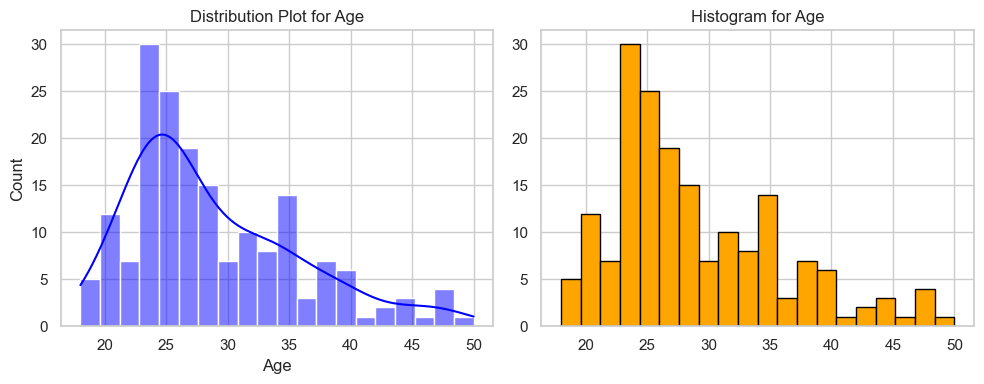

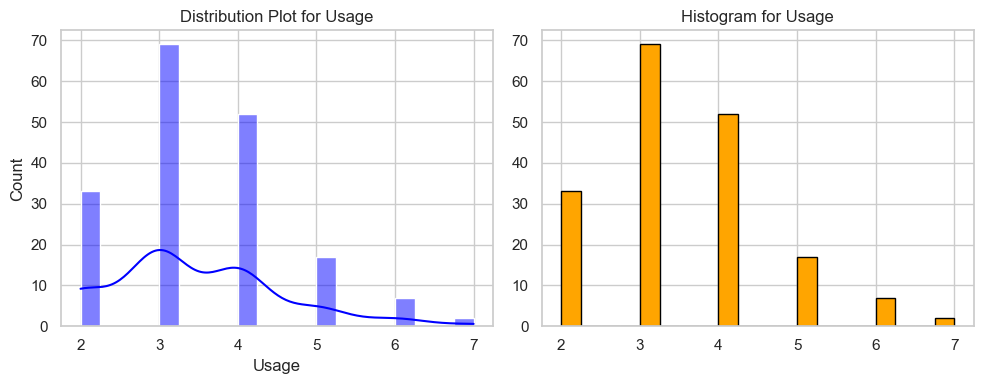

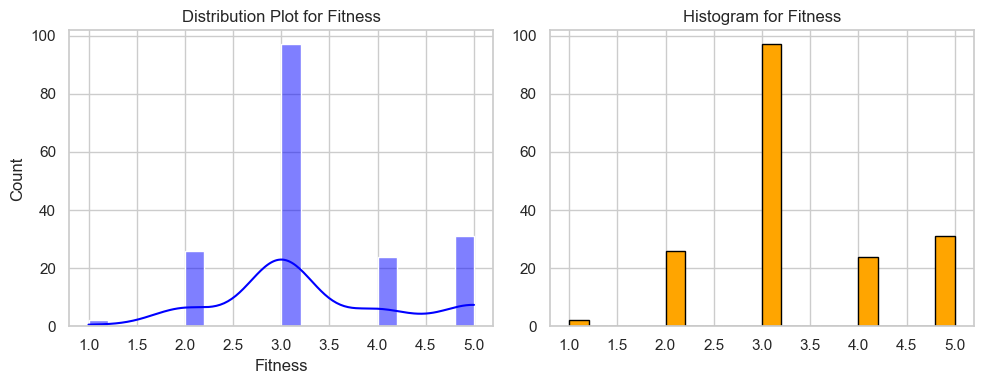

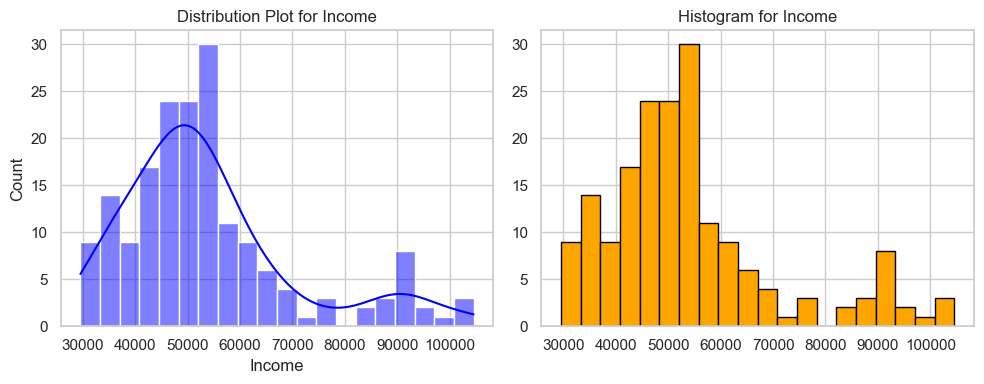

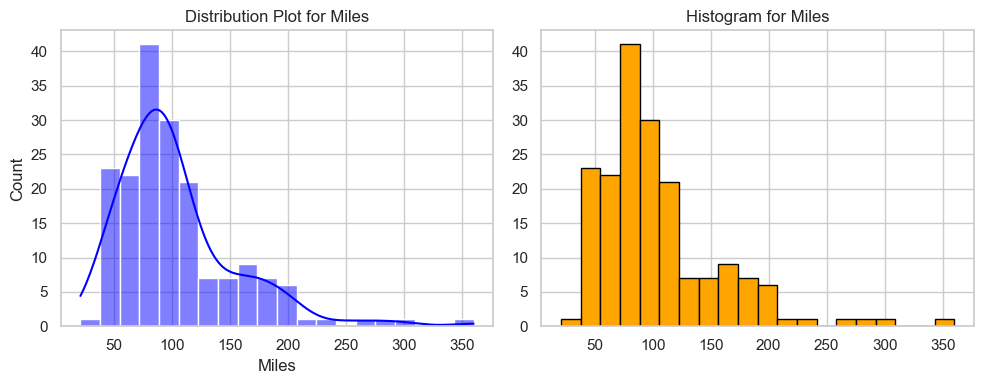

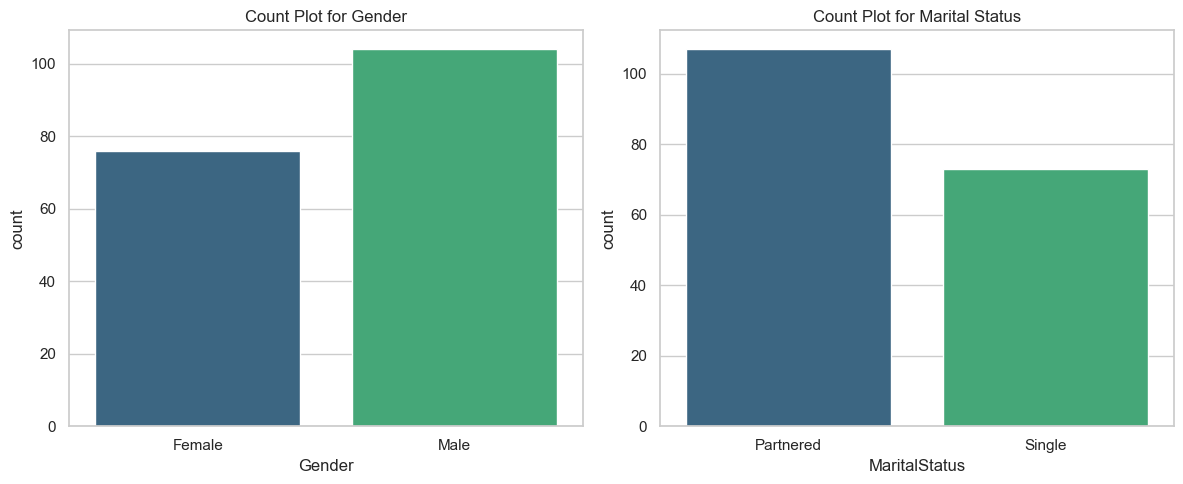

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style='whitegrid')

# List of continuous variables for analysis
continuous_vars = ['Age', 'Usage', 'Fitness', 'Income', 'Miles']

# Loop through continuous variables to plot distplot and histogram
for var in continuous_vars:
    plt.figure(figsize=(10, 4))
    
    # Distplot for each continuous variable
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True, bins=20, color='blue')
    plt.title(f'Distribution Plot for {var}')
    
    # Histogram for each continuous variable
    plt.subplot(1, 2, 2)
    plt.hist(df[var], bins=20, color='orange', edgecolor='black')
    plt.title(f'Histogram for {var}')
    
    plt.tight_layout()
    plt.show()

# Countplot for categorical variables: Gender, MaritalStatus
plt.figure(figsize=(12, 5))

# Countplot for 'Gender'
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender', palette='viridis')
plt.title('Count Plot for Gender')

# Countplot for 'MaritalStatus'
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='MaritalStatus', palette='viridis')
plt.title('Count Plot for Marital Status')

plt.tight_layout()
plt.show()


## 3.2 For categorical variable(s): Boxplot: <a id='cat'></a>

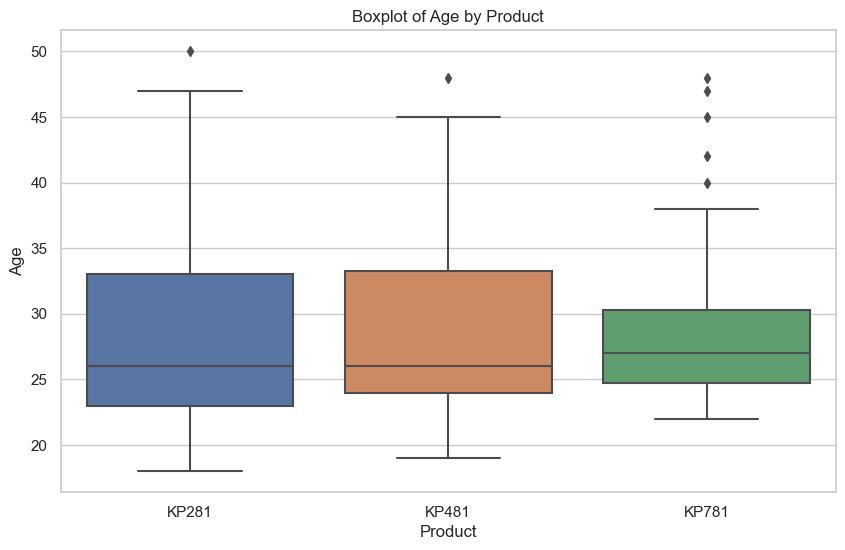

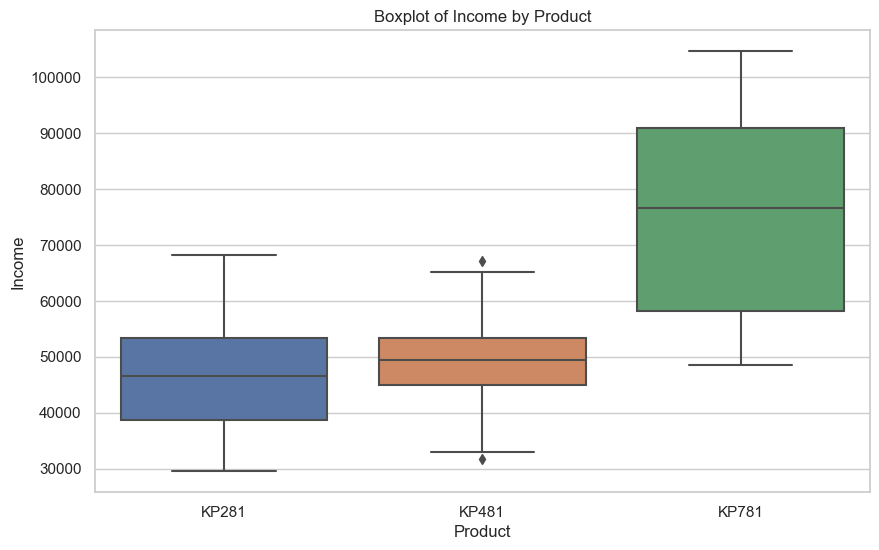

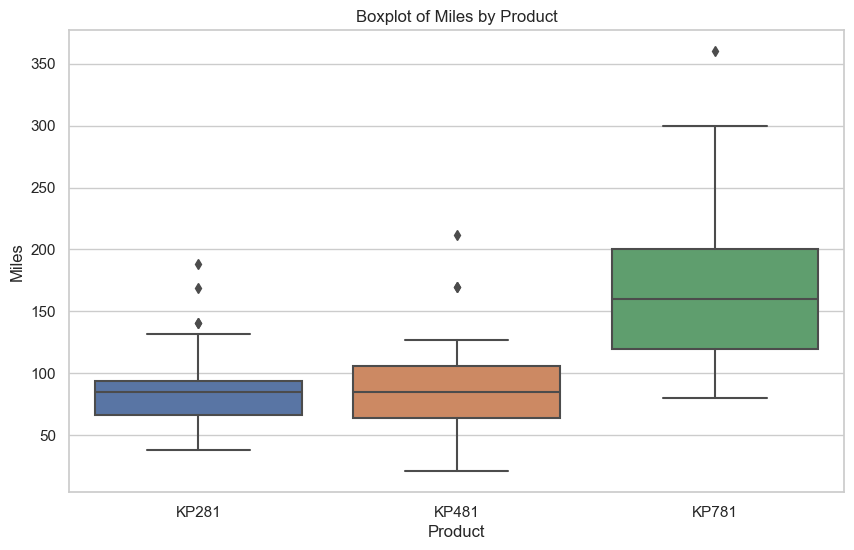

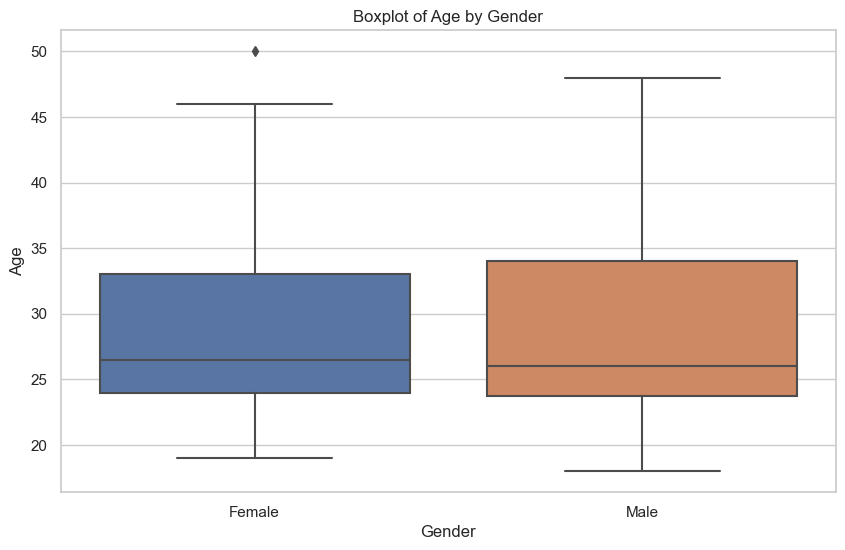

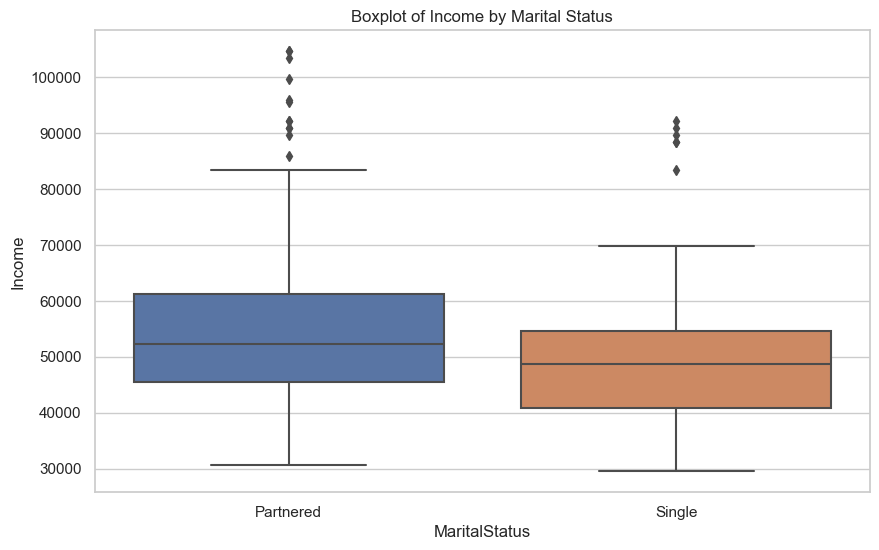

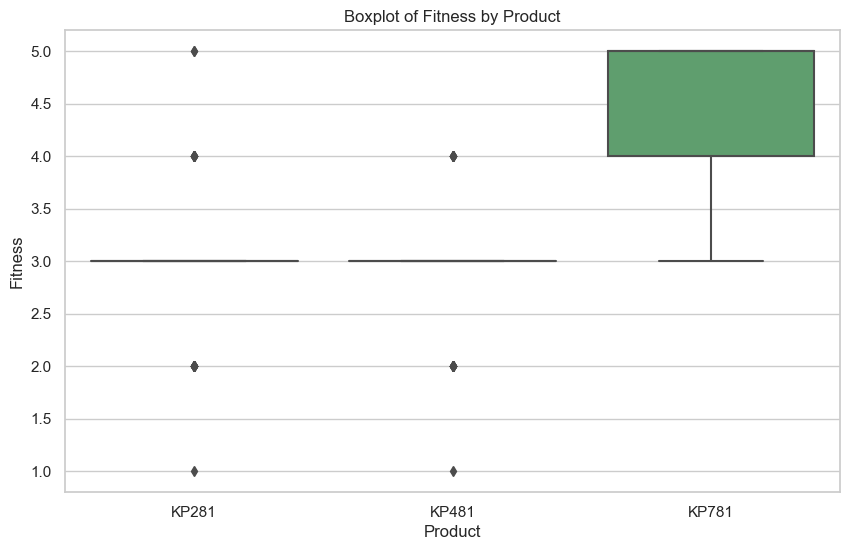

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Boxplot for Age by Product
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='Age', data=df)
plt.title('Boxplot of Age by Product')
plt.show()

# Boxplot for Income by Product
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Boxplot of Income by Product')
plt.show()

# Boxplot for Miles by Product
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='Miles', data=df)
plt.title('Boxplot of Miles by Product')
plt.show()

# Boxplot for Age by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Boxplot of Age by Gender')
plt.show()

# Boxplot for Income by MaritalStatus
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaritalStatus', y='Income', data=df)
plt.title('Boxplot of Income by Marital Status')
plt.show()

# Boxplot for Fitness by Product
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='Fitness', data=df)
plt.title('Boxplot of Fitness by Product')
plt.show()


## 3.3 For correlation: Heatmaps, Pairplot: <a id='corr'></a>

C:\Users\nidhi\AppData\Local\Temp\ipykernel_30444\568513372.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


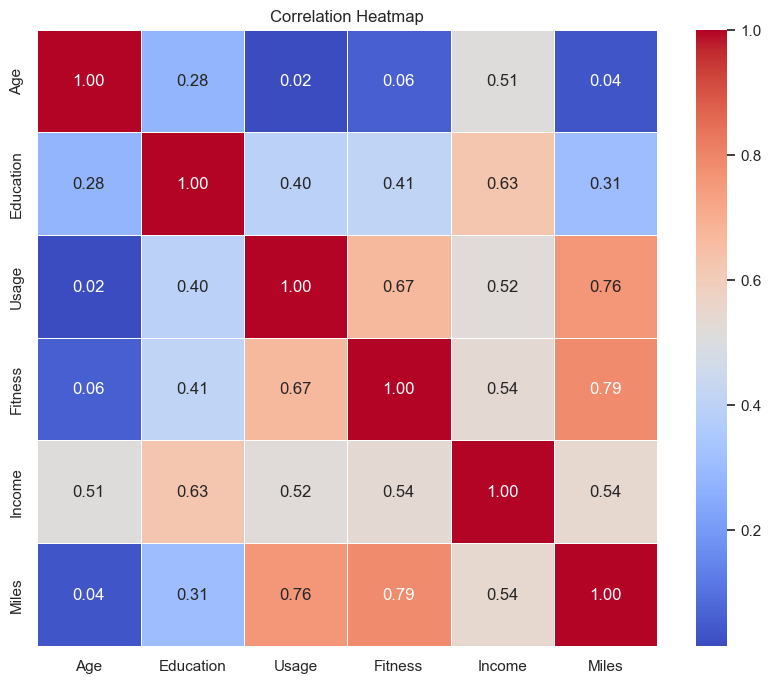

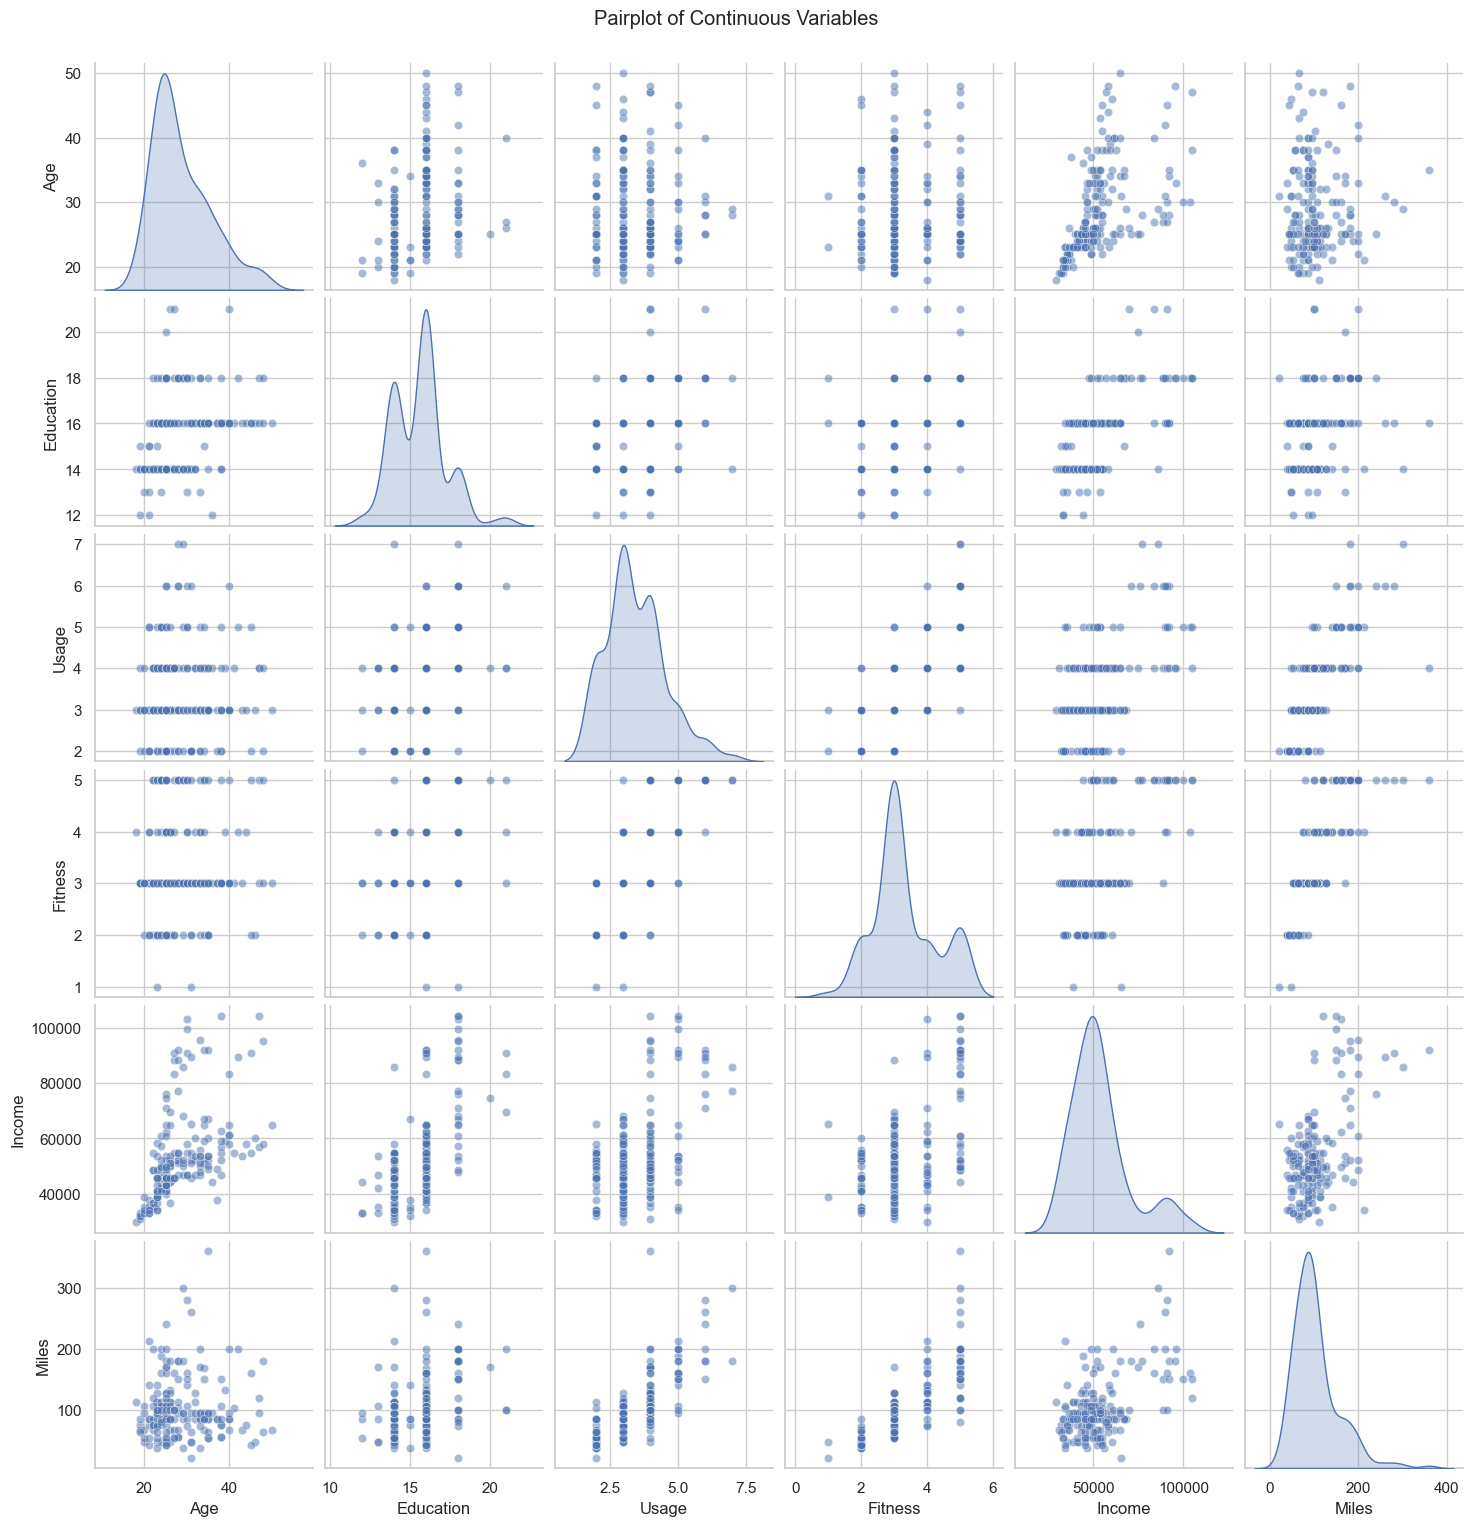

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Heatmap

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the plot size
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 2. Pairplot

# Pairplot for continuous variables
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Continuous Variables', y=1.02)
plt.show()


===========================================================
# 4. Missing Value and Outlier Detection:<a id='miss_outl'></a>
===========================================================

In [18]:
# 1. Missing Value Detection

# Display the count of missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)



Missing Values in Each Column:
 Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


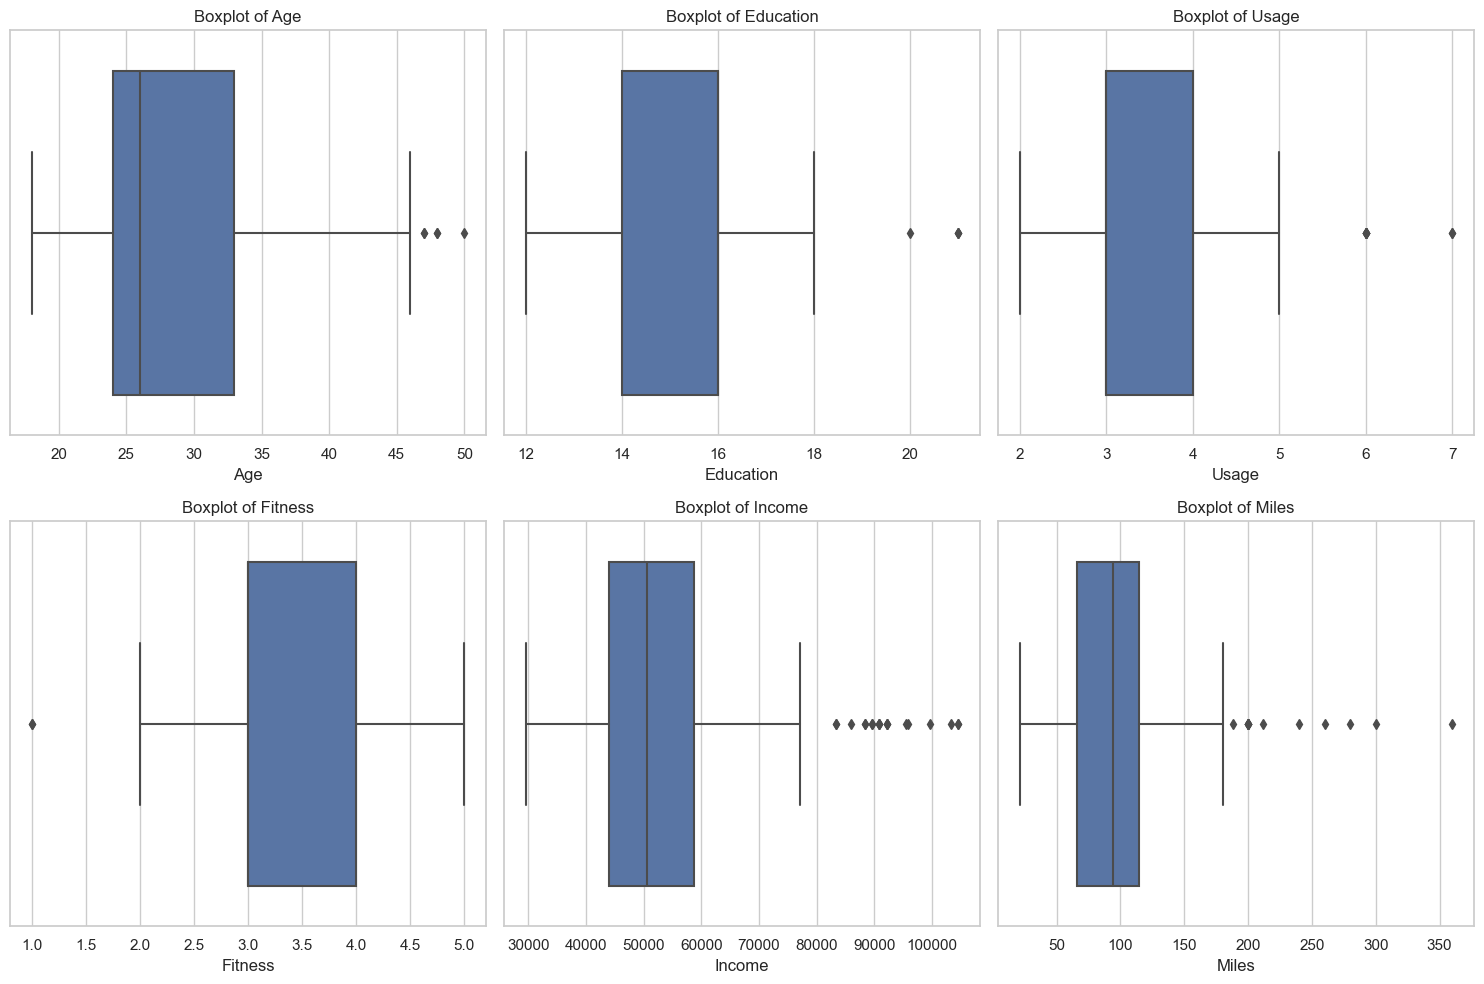

In [19]:
# 2. Outlier Detection using Boxplots

# Continuous variables in the dataset
continuous_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Plot boxplots for each continuous variable to identify outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(continuous_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



In [20]:
# 3. Outlier Detection using Z-score Method

from scipy import stats

# Z-score method to identify outliers
z = np.abs(stats.zscore(df[continuous_columns]))

# Display the outliers using Z-score
outliers = (z > 3).sum(axis=0)
print("Outliers detected using Z-score method:\n", outliers)

Outliers detected using Z-score method:
 Age          1
Education    3
Usage        2
Fitness      0
Income       3
Miles        4
dtype: int64


In [21]:
# Set display options to avoid wrapping of DataFrame columns
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
# 4. Outlier Detection using IQR Method

# Detecting outliers using IQR for each continuous column
for col in continuous_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers detected in {col} using IQR method:\n", outliers_iqr)




Outliers detected in Age using IQR method:
     Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
78    KP281   47    Male         16     Partnered      4        3   56850     94
79    KP281   50  Female         16     Partnered      3        3   64809     66
139   KP481   48    Male         16     Partnered      2        3   57987     64
178   KP781   47    Male         18     Partnered      4        5  104581    120
179   KP781   48    Male         18     Partnered      4        5   95508    180

Outliers detected in Education using IQR method:
     Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
156   KP781   25    Male         20     Partnered      4        5   74701    170
157   KP781   26  Female         21        Single      4        3   69721    100
161   KP781   27    Male         21     Partnered      4        4   90886    100
175   KP781   40    Male         21        Single      6        5   83416    200

Outliers det

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [23]:
df_KP781.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 140 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        40 non-null     category
 1   Age            40 non-null     int64   
 2   Gender         40 non-null     category
 3   Education      40 non-null     int64   
 4   MaritalStatus  40 non-null     category
 5   Usage          40 non-null     int64   
 6   Fitness        40 non-null     int64   
 7   Income         40 non-null     int64   
 8   Miles          40 non-null     int64   
dtypes: category(3), int64(6)
memory usage: 2.7 KB


### Remarks on Outlier Handling Strategy:

After a thorough analysis of the outliers identified using both the Z-score and IQR methods, we have concluded the following:

1. **Outliers in Age, Education, and Fitness**:  
   - The number of outliers identified in the variables **Age (5 outliers), Education (4 outliers), and Fitness (2 outliers)** is relatively low compared to the overall dataset size.  
   - These outliers are unlikely to significantly impact the overall data distribution or the subsequent analysis and modeling results.  
   - Therefore, we will **neglect these outliers** and retain them in the dataset to avoid unnecessary data loss.

2. **Outliers in Income, Usage, and Miles for KP781 Product Category**:  
   - Most of the outliers for the variables **Income, Usage, and Miles** are concentrated in the **KP781** product category, indicating that this customer segment differs significantly from those associated with the other product categories (KP281 and KP481).  
   - These "outliers" appear to represent typical characteristics or behaviors of customers for the KP781 product, suggesting that they are not true outliers but are instead reflective of a distinct customer segment.  
   - Removing these data points could result in a loss of valuable segment-specific information.  
   - Hence, we will **retain these outliers** in our dataset to preserve the unique characteristics of the KP781 customer segment and maintain the integrity of the real-world variability captured in the data.

### Summary Decision:

- We have decided to **retain all the outliers** in the dataset based on the analysis that they either do not significantly impact the overall data distribution or are representative of a distinct customer segment for the KP781 product.  
- This approach allows us to maintain the dataset's integrity, ensure a comprehensive understanding of all customer segments, and reflect real-world variability in the data.

By proceeding with this strategy, we aim to conduct a more accurate and representative analysis that acknowledges the diversity within our customer base while avoiding unnecessary data loss.

=====================================================================================================
# 5. Business Insights: Based on Non-graphical and Visual Analysis:<a id='insights'></a>
=====================================================================================================

## 5.1 Comments on the range of attributes: <a id='roa'></a>

1. **Age:**

    - The age of the customers ranges from 19 to 50. This suggests that the products are being marketed to and purchased by a fairly young demographic, with a slight skew towards younger adults.
    - This information could be useful for tailoring marketing campaigns and product features to the preferences of younger consumers.

2. **Education:**

    - The education level ranges from 12 to 21 years of education. This indicates a diverse customer base in terms of educational background, with the majority being relatively well-educated.
    - This could imply that the products are attracting educated customers who may be more informed about fitness and wellness.

3. **Usage:**

    - Usage frequency ranges from 2 to 7 times per week. This wide range suggests that customers vary significantly in how often they use the products. It could be valuable to explore why some customers use the product more frequently than others and whether this impacts satisfaction or loyalty.

4. **Fitness:**

    - The fitness levels range from 1 to 5. This distribution suggests a mix of different fitness levels among customers, from beginners to those more advanced or fitness-conscious.
    - This diversity could be leveraged to offer different tiers or types of products tailored to varying fitness levels.

5. **Income:**

    - Income ranges from USD 31,836 to USD 104,581. This broad range of income levels suggests that the product appeals to a diverse economic demographic, potentially pointing towards a product that is valued across multiple economic segments.
    - It's crucial to consider how product pricing, packaging, and promotional efforts might resonate differently across these income levels.

6. **Miles:**

    - The miles attribute, representing miles covered per week, ranges from 21 to 360 miles. This wide range indicates diverse usage patterns among customers, possibly pointing to varied fitness goals or routines.
    - Understanding this attribute could help in targeting communications and services to different customer segments (e.g., beginner vs. advanced runners).

## 5.2 Comments on the distribution of variables and the relationship between them: <a id='dov_rbt'></a>

1. Age and Income:

    - There seems to be a slight positive correlation between age and income. Older customers tend to have higher incomes, which might affect purchasing decisions and product preferences.

2. Usage and Fitness:

    - A higher usage frequency appears to correlate positively with higher fitness levels. This suggests that customers who use the product more frequently are generally more fit, which could be an indicator of customer satisfaction or the effectiveness of the product in promoting fitness.

3. Gender and Product Preference:

    - A skew towards more males in the KP781 category compared to the more balanced distribution in other product categories. This might suggest a gender preference for more advanced or specialized products.

4. Income and Product Category:

    - Customers in the KP781 product category tend to have higher incomes on average. This might suggest that KP781 is perceived as a premium product, or it might appeal to more affluent customers.

5. Miles and Fitness:

    - A positive correlation is observed between miles covered per week and fitness level, suggesting that higher mileage is associated with greater fitness, which makes sense logically and supports the data’s validity.

6. Marital Status and Product Choice:

    - There is no strong indication that marital status significantly influences product choice, but it might have a moderate impact on usage frequency and fitness levels.

## 5.3 Comments for each univariate and bivariate plot: <a id='univ_biv'></a>

**Univariate Analysis (Histograms and Distplots):**
1. **Age:** The age distribution appears to be somewhat right-skewed, with more younger adults in the dataset. This suggests the product appeals primarily to a younger demographic.
2. **Income:** The income distribution is slightly left-skewed, indicating a concentration of customers in the lower to middle-income range, with a smaller number in the higher-income range.
3. **Usage:** Usage shows a somewhat uniform distribution, with some peaks at higher usage frequencies. This suggests a diverse customer base in terms of product engagement.
4. **Fitness:** The fitness level is heavily right-skewed, with most customers falling within the mid to high range of fitness. This indicates the product is popular among already fit individuals.

**Bivariate Analysis (Boxplots and Pairplots):**
1. **Age vs. Income:** Boxplots show that older customers tend to have higher incomes. This aligns with common demographic patterns.
2. **Usage vs. Fitness:** Pairplots indicate that customers who use the product more frequently tend to have higher fitness levels. This might suggest that higher engagement with the product contributes to better fitness outcomes.
3. **Income vs. Product Category:** Boxplots suggest that the KP781 category attracts higher-income customers, which may indicate that it is positioned as a premium product.

=====================================================================================================
# 6. Recommendations: Actionable items for business:<a id='insights'></a>
=====================================================================================================

Based on the analysis and insights derived from both non-graphical and visual analysis, here are the actionable recommendations for the business:

#### 1. **Segment-Based Marketing Strategy:**
   - **Target High-Usage Customers:**
     - Focus marketing efforts on customers who already use the products frequently (`Usage` levels of 5 and above). These customers likely derive the most value from the product, making them prime candidates for cross-selling, upselling, or loyalty programs.  
   - **Promote to Younger Demographic:**
     - Given the skew towards younger customers, campaigns tailored specifically to younger age groups (20-30 years) could drive further engagement. Consider using social media platforms like Instagram, TikTok, and YouTube, which are popular among this demographic.
   - **Leverage Gender Preferences:**
     - Since the KP781 product seems more popular among males, consider creating marketing campaigns that highlight male-centric use cases or benefits, while also identifying opportunities to attract more female customers.

#### 2. **Product Differentiation and Development:**
   - **Position KP781 as a Premium Product:**
     - With customers in the KP781 category showing higher incomes and different usage patterns, this product could be positioned as a premium offering. Features such as personalized training plans, higher-end materials, or exclusive benefits could help reinforce this positioning.
   - **Product Bundles and Variants:**
     - Consider creating product bundles that cater to different fitness levels, usage patterns, and goals. For example, beginner bundles, intermediate bundles, and advanced athlete bundles. These bundles can be further differentiated based on fitness frequency and the number of miles covered per week.

#### 3. **Pricing Strategy Adjustments:**
   - **Tiered Pricing:**
     - Since income levels are diverse across customers, a tiered pricing strategy could help cater to different economic segments. Offering entry-level, mid-tier, and premium product options would ensure that there is a product available for every customer segment.
   - **Discounts for High Usage:**
     - Consider implementing a discount strategy that rewards high-usage customers or loyal customers. For example, customers who use the product more than a certain number of times per week could receive discounts on future purchases or loyalty points.

#### 4. **Customer Engagement and Retention:**
   - **Personalized Fitness Plans:**
     - Develop personalized fitness plans that align with customers’ usage frequency and fitness levels. For example, a customer who uses the product 3 times a week could receive a tailored workout plan and dietary advice.
   - **Loyalty Programs:**
     - Implement loyalty programs that reward customers based on their usage frequency and engagement with the product. This could involve point-based systems where customers earn points for every purchase or milestone reached (e.g., miles covered).
   - **Feedback and Reviews:**
     - Encourage feedback and reviews, particularly from high-frequency users and those with high fitness levels, to understand what drives satisfaction and how to enhance the product experience further.

#### 5. **Explore New Customer Segments:**
   - **Expand to Different Age Groups:**
     - Since the current customer base skews younger, consider developing products or features that might appeal to older demographics (e.g., low-impact exercise equipment, joint-friendly treadmills, etc.).
   - **Appeal to Lower-Income Segments:**
     - Given that some customers are in the lower income range, consider developing affordable product variants or financing options (e.g., installment payments) to attract a broader customer base.

#### 6. **Optimize Product Design and Features:**
   - **Enhance Product Features for Different Fitness Levels:**
     - Given the wide range of fitness levels, consider adding features to the product that cater to both beginners and more advanced users. For instance, adjustable resistance levels, different workout modes, or additional digital content such as guided workouts could cater to varied customer needs.
   - **Innovation Based on Usage Patterns:**
     - Products like KP781, which show different customer patterns, might benefit from innovation based on these patterns. Consider developing features that encourage more frequent use or provide more value to high-mileage users (e.g., mileage tracking, performance analytics, and progress reports).

#### 7. **Improve Data Collection and Analytics:**
   - **Customer Insights Programs:**
     - Develop a customer insights program to continuously gather data on customer behavior, preferences, and satisfaction. This data can be used to fine-tune marketing strategies, product development, and customer retention programs.
   - **Behavioral Analytics:**
     - Use behavioral analytics to identify patterns in customer engagement, product use, and purchase behavior. This can help predict future buying patterns and target customers with more personalized offers.

#### 8. **Strengthen Customer Education and Support:**
   - **Fitness Education and Content Marketing:**
     - Create and distribute educational content such as blogs, webinars, and online courses on fitness and wellness topics. This could help establish the brand as an authority in the fitness space, attract new customers, and retain existing ones.
   - **Customer Support Enhancements:**
     - Improve customer support by offering real-time assistance, product tutorials, and fitness guidance. Providing exceptional customer service could enhance customer loyalty and reduce churn.

#### 9. **Focus on Outliers as Potential Niche Opportunities:**
   - **Understand Outliers Better:**
     - Investigate the customers who represent outliers, especially those from the KP781 category. Understanding why they have different usage patterns or why they cover significantly more miles per week could provide insights into niche markets or specialized product opportunities.
   - **Niche Product Development:**
     - Consider developing niche products or specialized features targeting these outlier customers. This might involve introducing advanced or elite versions of the product with unique benefits.

### Conclusion:

Our current approach to handling outliers and customer segmentation seems to align well with a data-driven strategy. The above recommendations provide a structured plan for marketing, product development, pricing, and customer engagement that could enhance overall business performance. The focus on understanding different customer segments and optimizing product offerings accordingly is key to achieving sustainable growth.
